In [1]:
# load dependencies
from matplotlib import pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import scipy.stats as st
import seaborn as sns

In [2]:
# read in files
happiness_2018_index = pd.read_csv('../Data/happiness_index_2018.csv')
alcohol_consumption = pd.read_csv('../Data/alcohol_consumption.csv')
happiness_2015_index = pd.read_csv('../Data/happiness_index_2015.csv')

# merge csv files
df = pd.merge(happiness_2018_index, alcohol_consumption, on='Country', how='outer')

# df_2015 = pd.merge(df, happiness_2015_index, on='Country', how="outer")

# check the file has been read in
df.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Indicator Name,Indicator Code,2000,2005,2010,2015,2018
0,1.0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,FIN,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,11.69,13.11,12.59,11.18,10.78
1,2.0,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,NOR,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,7.95,8.87,8.94,7.52,7.41
2,3.0,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,DNK,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,12.67,12.29,11.00,10.36,10.26
3,4.0,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,ISL,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,7.03,7.74,7.50,8.74,9.12
4,5.0,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,CHE,Total alcohol consumption per capita (liters o...,SH.ALC.PCAP.LI,12.49,11.64,11.41,11.58,11.53


In [4]:
# clean dataframe with only the relevant data
df = df[['Country', 'Country Code', 'Score', 'GDP per capita',"Social support", 'Healthy life expectancy', "Freedom to make life choices",
         'Generosity', 'Perceptions of corruption','2018']]

# check dataframe for any errors
df = df.dropna()

# rename columns

df =df.rename(columns={"Country Code": "con_code", 
                       "GDP per capita": "GDP", 
                       "Social support": "social",
                       "Healthy life expectancy": "life_expectancy",
                       "Freedom to make life choices": "freedom",
                       'Perceptions of corruption': "corruption",
                       "2018": "alcohol_consumption"})

df

,Country,con_code,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption
0,Finland,FIN,7.632,1.305,1.592,0.874,0.681,0.202,0.393,10.78
1,Norway,NOR,7.594,1.456,1.582,0.861,0.686,0.286,0.340,7.41
2,Denmark,DNK,7.555,1.351,1.590,0.868,0.683,0.284,0.408,10.26
3,Iceland,ISL,7.495,1.343,1.644,0.914,0.677,0.353,0.138,9.12
4,Switzerland,CHE,7.487,1.420,1.549,0.927,0.660,0.256,0.357,11.53
...,...,...,...,...,...,...,...,...,...,...
148,Liberia,LBR,3.495,0.076,0.858,0.267,0.419,0.206,0.030,6.12
150,Rwanda,RWA,3.408,0.332,0.896,0.400,0.636,0.200,0.444,8.95
152,Tanzania,TZA,3.303,0.455,0.991,0.381,0.481,0.270,0.097,11.27
154,Central African Republic,CAF,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2.38


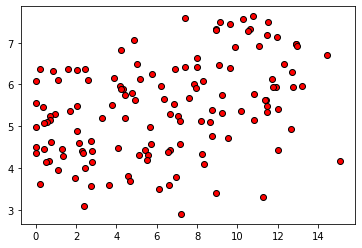

<Figure size 432x288 with 0 Axes>

In [6]:
# data check
alcohol_c = df["alcohol_consumption"]
score = df['Score']

# create and format plot
plt.scatter(alcohol_c, score, marker="o", facecolors="red", edgecolors="black")

# show plot
plt.show()
plt.tight_layout()


In [7]:
corr = st.pearsonr(alcohol_c,score)

corr

(0.3812426035319439, 5.501157340957053e-06)

In [8]:
df.describe()

,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,5.427545,0.885933,1.228037,0.599500,0.467873,0.181754,0.115925,6.319821
std,1.135004,0.384586,0.299252,0.248339,0.160748,0.101018,0.100094,4.101257
min,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000
25%,4.449250,0.608750,1.091000,0.418750,0.376250,0.110250,0.051250,2.492500
50%,5.441000,0.950000,1.280000,0.667500,0.503500,0.173500,0.082000,6.460000
75%,6.297500,1.185000,1.467500,0.784000,0.584750,0.241000,0.141000,9.587500
max,7.632000,1.649000,1.644000,1.008000,0.724000,0.598000,0.457000,15.090000


In [11]:
top10Countries = df[(df.Score > 7)]

top10Countries.describe()

,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.372538,1.317231,1.542154,0.885615,0.643538,0.284077,0.284846,9.692308
std,0.177600,0.107447,0.062055,0.028745,0.057912,0.064976,0.114106,1.928022
min,7.072000,1.010000,1.433000,0.817000,0.464000,0.143000,0.082000,4.870000
25%,7.272000,1.305000,1.501000,0.874000,0.638000,0.256000,0.224000,8.940000
50%,7.328000,1.341000,1.549000,0.888000,0.659000,0.285000,0.302000,10.260000
75%,7.495000,1.355000,1.590000,0.910000,0.677000,0.333000,0.383000,10.780000
max,7.632000,1.456000,1.644000,0.927000,0.686000,0.365000,0.408000,11.960000


In [14]:
bottom10Countries = df[(df.Score < 4)]

bottom10Countries.describe()

,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3.574467,0.350133,0.796400,0.262133,0.332133,0.180200,0.100867,4.720667
std,0.303548,0.254742,0.325643,0.117467,0.205329,0.082082,0.098754,3.093393
min,2.905000,0.024000,0.000000,0.010000,0.000000,0.042000,0.030000,0.210000
25%,3.451500,0.222500,0.584000,0.229500,0.153000,0.140500,0.055000,2.420000
50%,3.590000,0.332000,0.858000,0.267000,0.406000,0.185000,0.092000,4.590000
75%,3.784500,0.406000,1.042500,0.343500,0.457500,0.208000,0.100000,6.765000
max,3.999000,1.017000,1.215000,0.417000,0.636000,0.392000,0.444000,11.270000


### CREATE DATABASE CONNECTION